## The following analysis aims to predict bank turnover from customers wiht the aid of the churn modelling dataset . 

In [ ]:
#Importing the libraries pertinent to our analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier

In [107]:
file_path = r"C:\Users\Gregory Bazuaye\Download\Churn_Modelling.csv"
dataset = pd.read_csv(file_path)
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# CLEANING

In [109]:
#Checking for null values
dataset.isnull().sum()
#No  feature of the dataset requires any sort of imputation

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Exploration

In [110]:
#Removal of unnecessary columns that define the identity of the customer
dataset.drop(columns =['CustomerId' , 'Surname' , 'RowNumber'] , inplace = True)


In [111]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [112]:
#Inspecting the number of uique values for object type features

dataset.select_dtypes(include ='object').nunique()

Geography    3
Gender       2
dtype: int64

Categorical Data

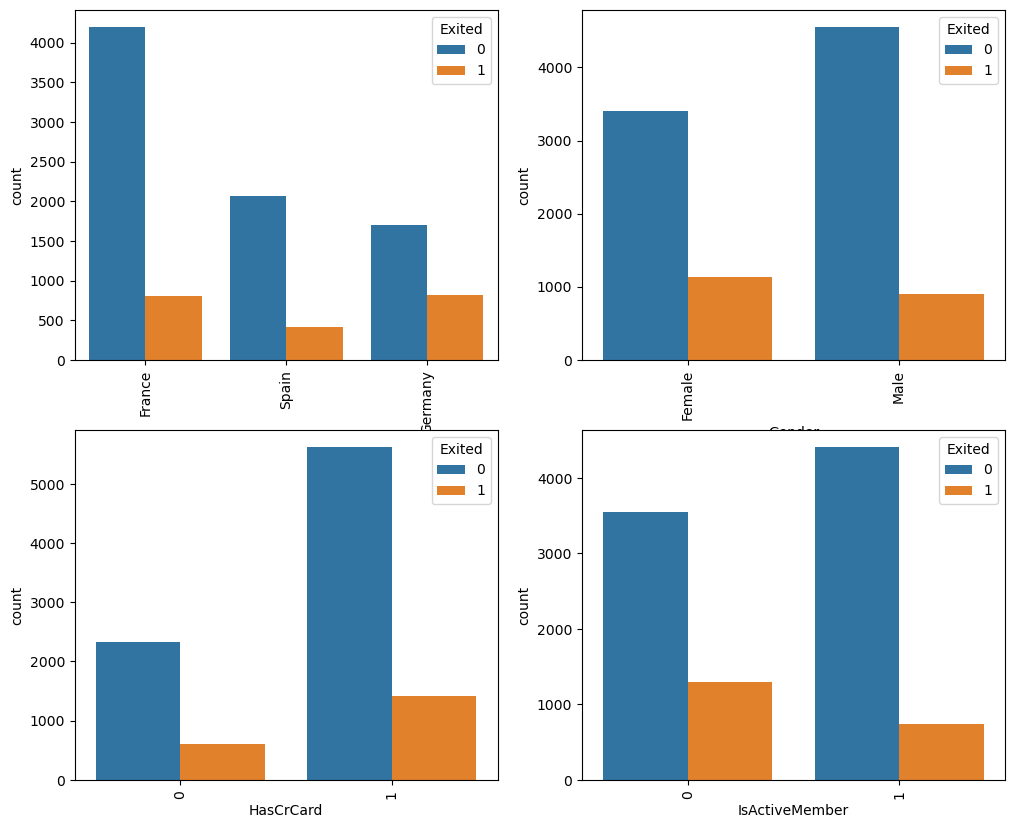

In [113]:
#Makin countplots of the categorical data
cat_vars =['Geography' , 'Gender' ,   'HasCrCard' ,'IsActiveMember' ]


fig , axs = plt.subplots( 2 , 2 , figsize =(12,10))
axs = axs.flatten()

for i , var in  enumerate(cat_vars):
    sb.countplot( x =var , hue ='Exited' , data = dataset , ax = axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels() , rotation = 90)
    
plt.show()

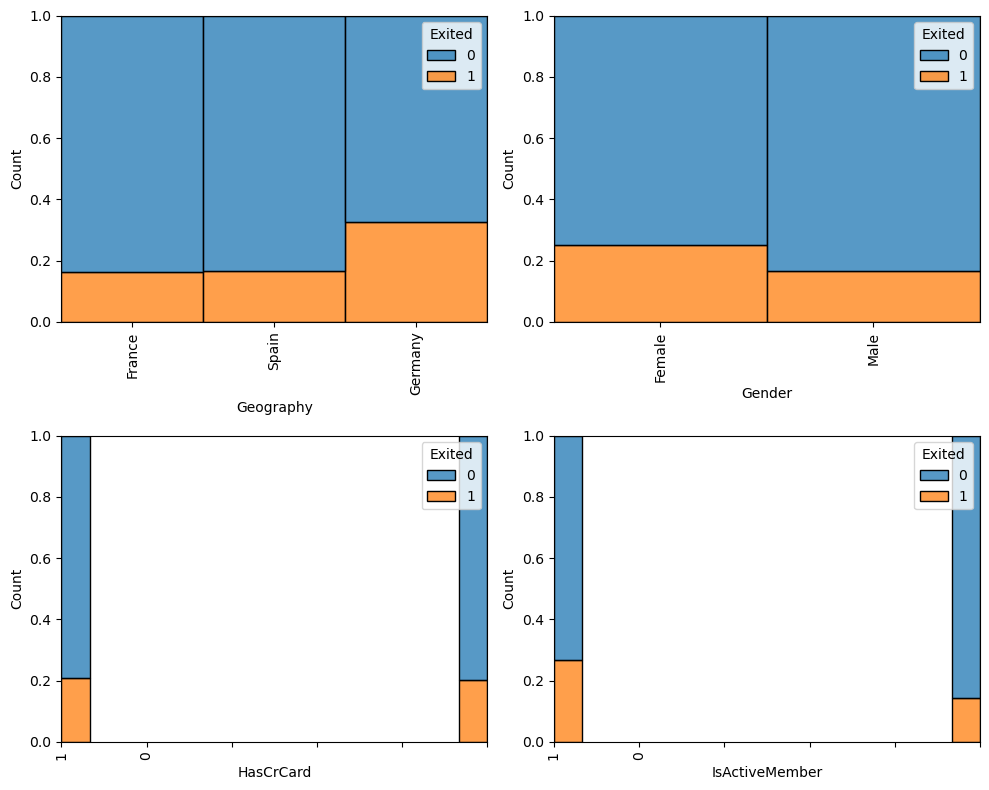

In [114]:
#Making histplots of the categorical data
import warnings
warnings.filterwarnings('ignore')
fig , axs = plt.subplots( 2 , 2 , figsize =(10,8))
axs = axs.flatten()

for i , var in enumerate(cat_vars) :
    sb.histplot(x = var , hue ='Exited' , data = dataset , ax = axs[i] , multiple = 'fill' , kde = False , element = 'bars')
    axs[i].set_xticklabels(dataset[var].unique() , rotation =90)
    axs[i].set_xlabel(var)
fig.tight_layout()
plt.show()

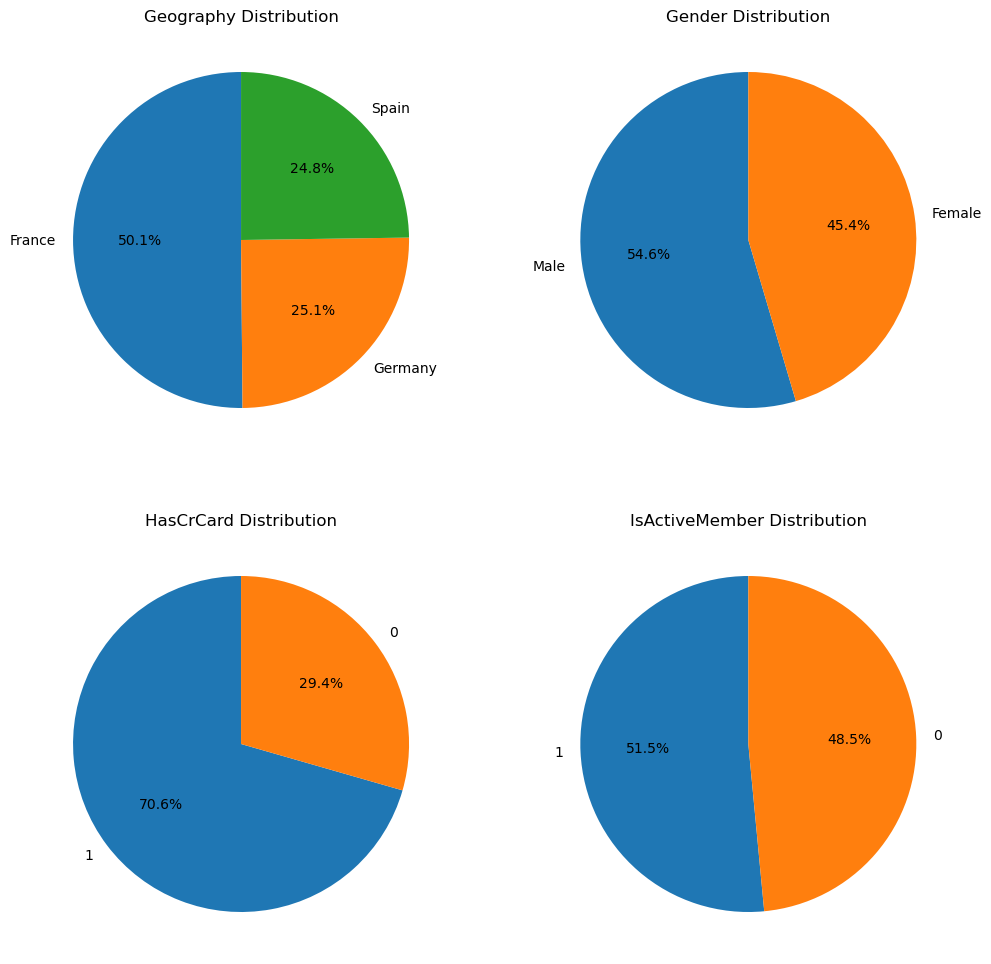

In [115]:
#Making a piechcart for the distribution of each categorical variable based on whether they exited or not

fig , axs = plt.subplots( 2, 2  ,figsize =(12 , 12))

for i , var in enumerate( cat_vars) :
    if i < len(axs.flat) :
        cat_counts = dataset[var].value_counts()
        
    axs.flat[i].pie(cat_counts , labels = cat_counts.index , autopct ='%1.1f%%', startangle = 90)
    axs.flat[i].set_title(f'{var} Distribution')
plt.show()

Numerical Variables

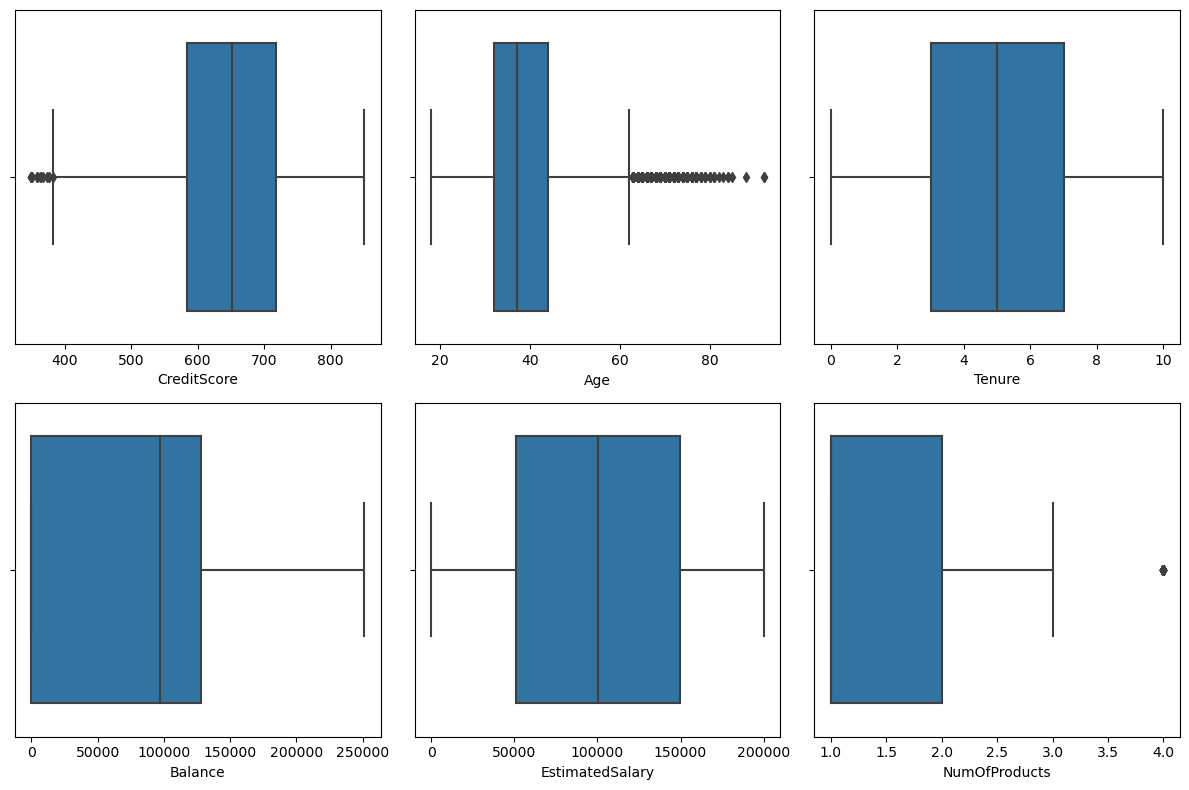

In [116]:
num_vars =['CreditScore' , 'Age' , 'Tenure' , 'Balance' , 'EstimatedSalary' ,'NumOfProducts']



fig , axs = plt.subplots( 2 , 3 , figsize=(12,8))
axs = axs.flatten()


for i , var in enumerate(num_vars):
    sb.boxplot( x= var ,  data = dataset , ax = axs[i])
    

fig.tight_layout()
plt.show()

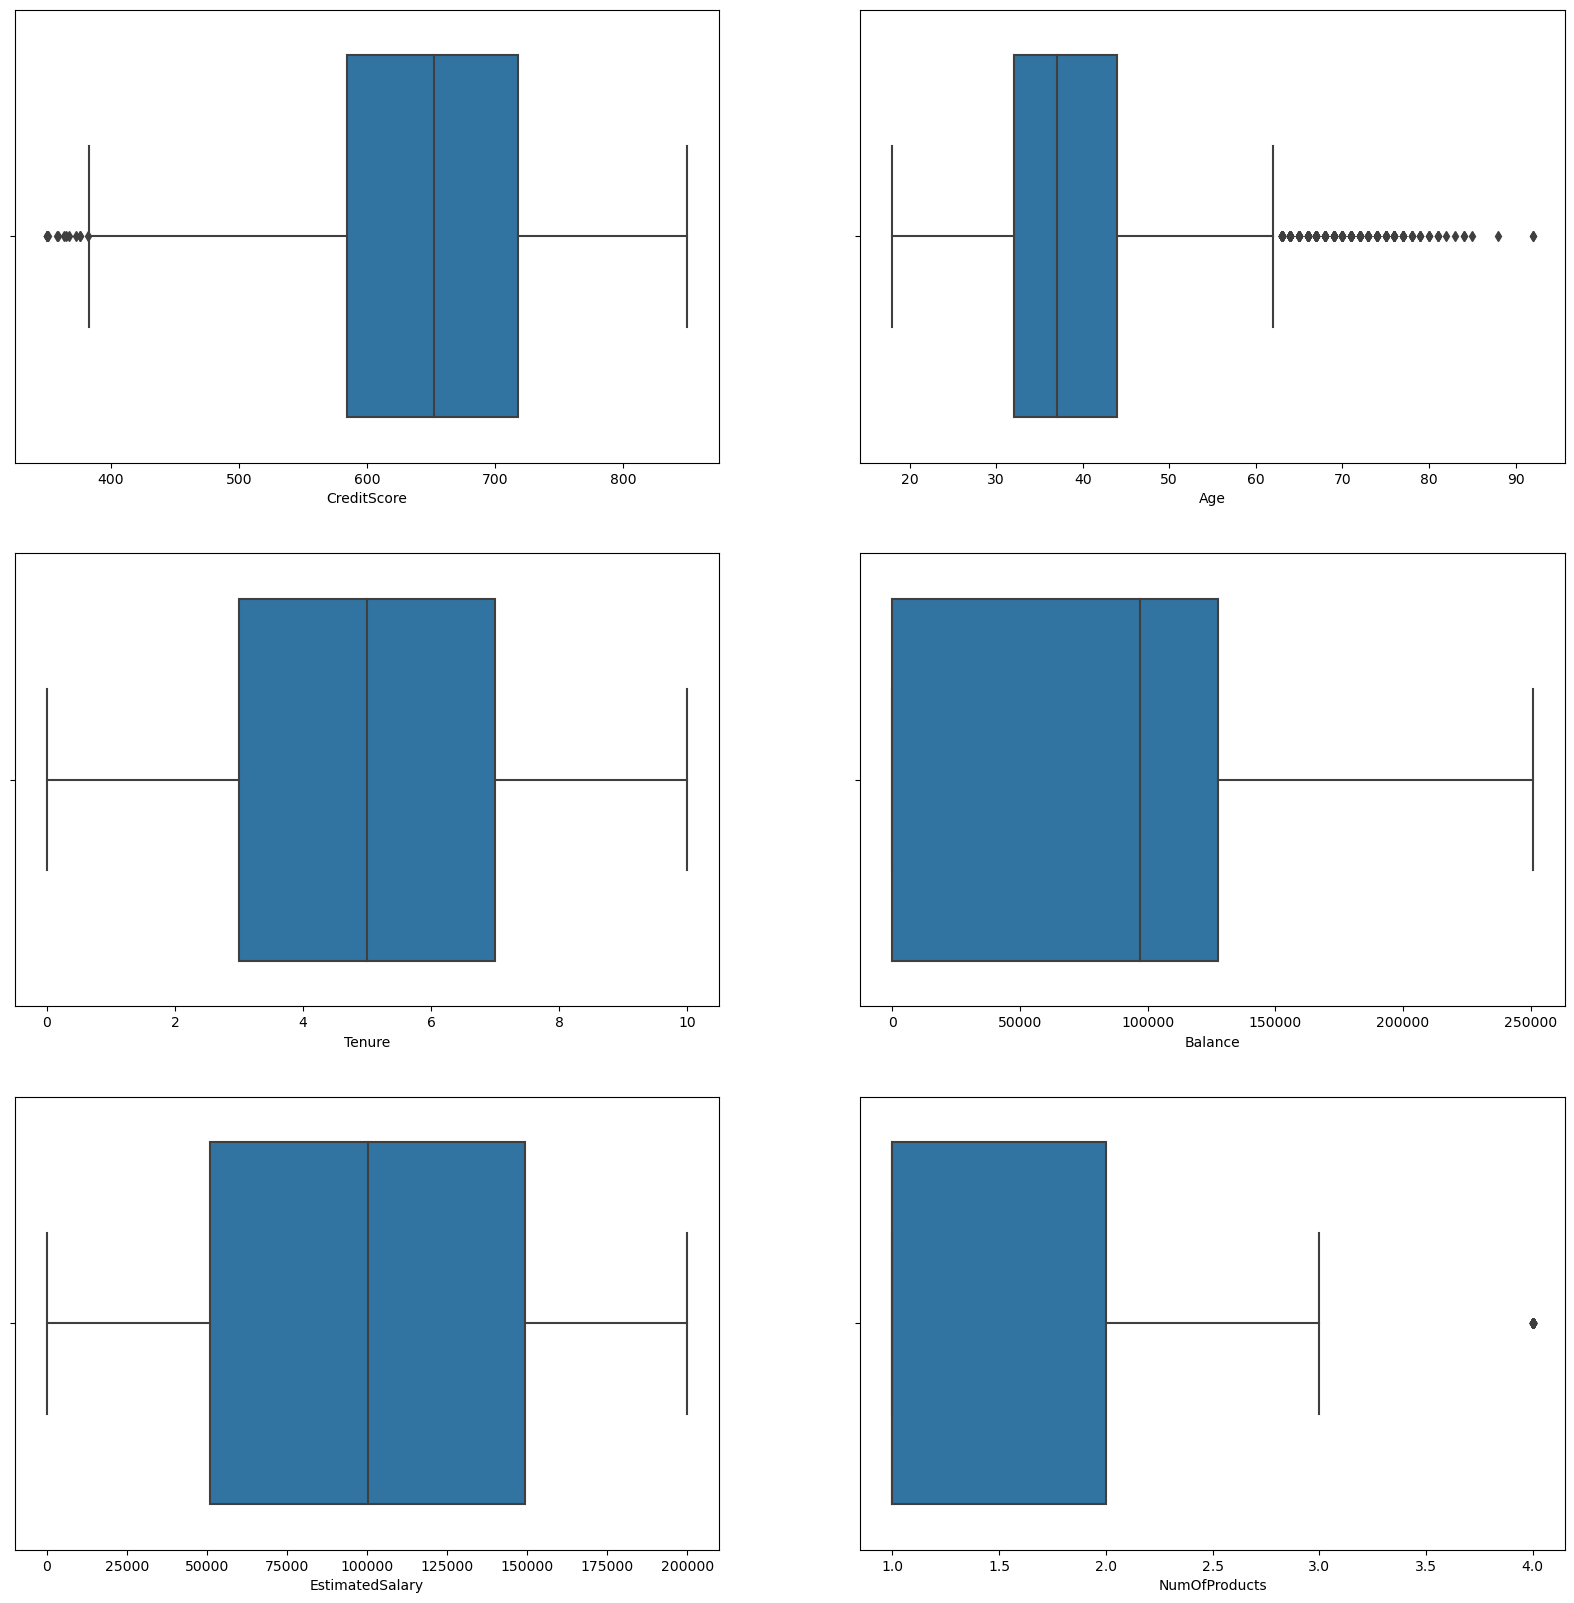

In [69]:
fig , axs  = plt.subplots( 3, 2  ,figsize = ( 20 , 20))
axs = axs.flatten()

for i , var in enumerate(num_vars) :
    sb.boxplot(x = var , hue ='Exited' , data = dataset , ax = axs[i] )

#fig.tight_layout()
plt.show()

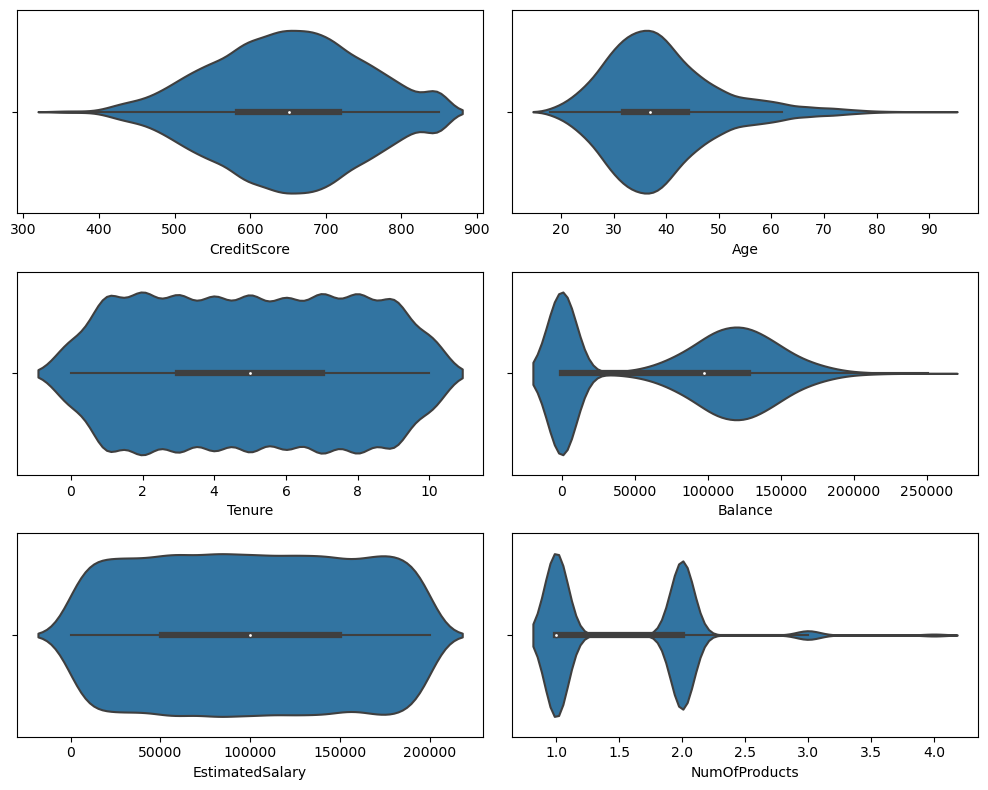

In [117]:
#violinplots of the numerical data

fig , axs = plt.subplots( 3 , 2 , figsize  = ( 10, 8))

axs = axs.flatten()

for i , var in enumerate(num_vars) :
    sb.violinplot(x = var , data = dataset , ax = axs[i])
    
fig.tight_layout()
plt.show()

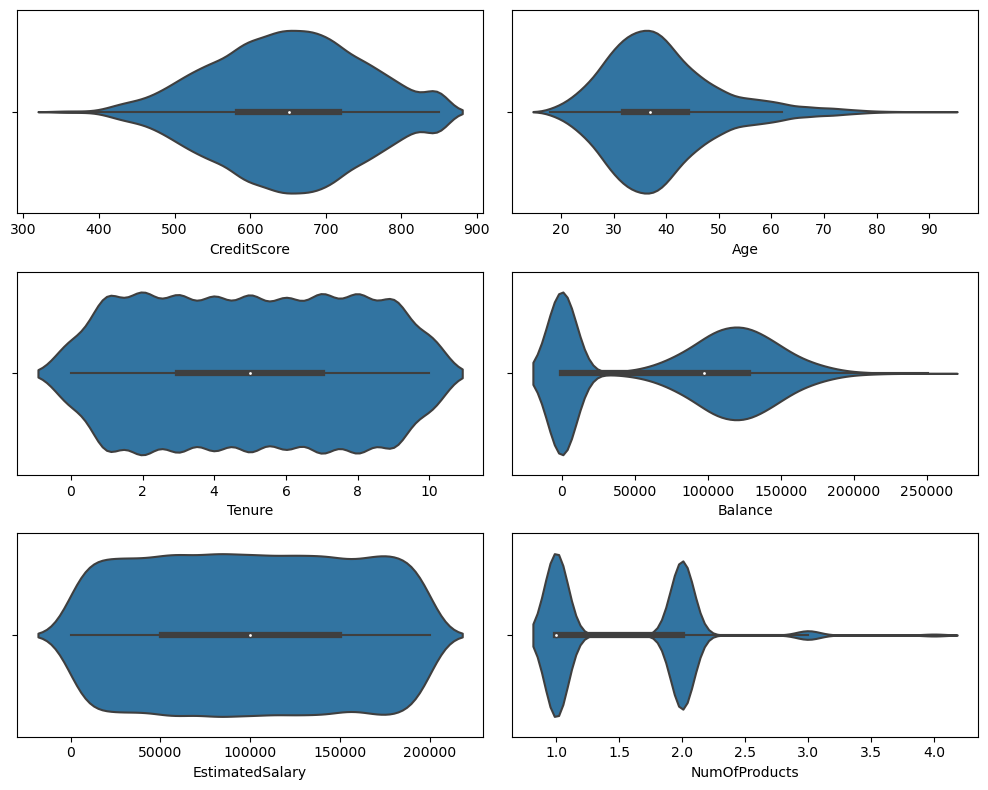

In [71]:
#violinplots of the numerical data

fig , axs = plt.subplots( 3 , 2 , figsize  = ( 10, 8))

axs = axs.flatten()

for i , var in enumerate(num_vars) :
    sb.violinplot(x = var , hue ='Exited' , data = dataset , ax = axs[i])
    
fig.tight_layout()
plt.show()

## Data proprecessing

In [118]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

for col in dataset.select_dtypes(include =['object']).columns:

            label_encoder.fit(dataset[col].unique())
            dataset[col] = label_encoder.transform( dataset[col])
            print(dataset[col].unique())

[0 2 1]
[0 1]


In [119]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


<Axes: >

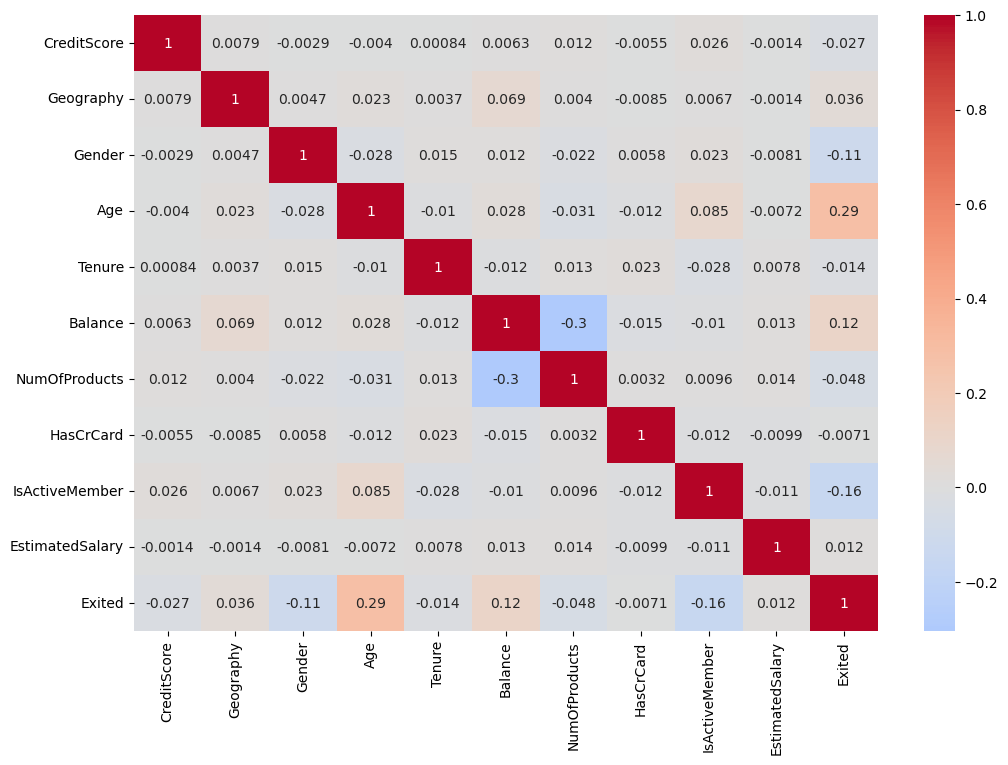

In [120]:
#Hatmap to show correlation
plt.figure( figsize = (12,8))
sb.heatmap(dataset.corr() , cmap ='coolwarm', center =0 ,annot = True)

In [125]:
#separating the dataset into train and testing
from sklearn.model_selection import train_test_split
y = dataset['Exited']
x = dataset.drop(columns ='Exited')

x_train ,x_test , y_train , y_test = train_test_split ( x , y , test_size = 0.2 , random_state = 20)


Removal Of Outliers

In [140]:
from scipy import stats
import numpy as np

# Columns for potential outliers
cols = ['Age' ,'CreditScore' , 'NumOfProducts']
z_scores = np.abs(stats.zscore(x_train[cols]))
threshold = 3
#Finding the indiceswhere there are outliers
outlier_indices = np.where(z_scores > threshold)[0]


#Removing the indices from the training set
x_train = x_train.drop(x_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

## Classification

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

classifier = RandomForestClassifier( class_weight ='balanced')

param_grid = {
             'n_estimators' : [100 , 200],
             'max_depth' : ['None ', 5 , 10],
             'max_features' :['sqrt' , 'log2' , None] ,
             'random_state' : [0 ,42]
     
           }
grid_search = GridSearchCV(classifier , param_grid , cv = 5)
grid_search.fit(x_train , y_train)

print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 42}


In [153]:
classifier = RandomForestClassifier(random_state = 200 , max_features ='sqrt', n_estimators = 200 , class_weight ='balanced' )

In [154]:
#fitting the values on the classifier
classifier.fit(x_train , y_train)
predictions = classifier.predict(x_test)



Results

In [155]:
#Testing accuracy
from sklearn.metrics import confusion_matrix , f1_score , accuracy_score ,precision_score

print(f' f-1score : {f1_score(predictions, y_test)}')
print(f'Accuracy-score : {accuracy_score(predictions ,y_test)}')
print(f'Precision Score : {precision_score(predictions , y_test)}')



 f-1score : 0.5581395348837209
Accuracy-score : 0.867
Precision Score : 0.44562334217506633


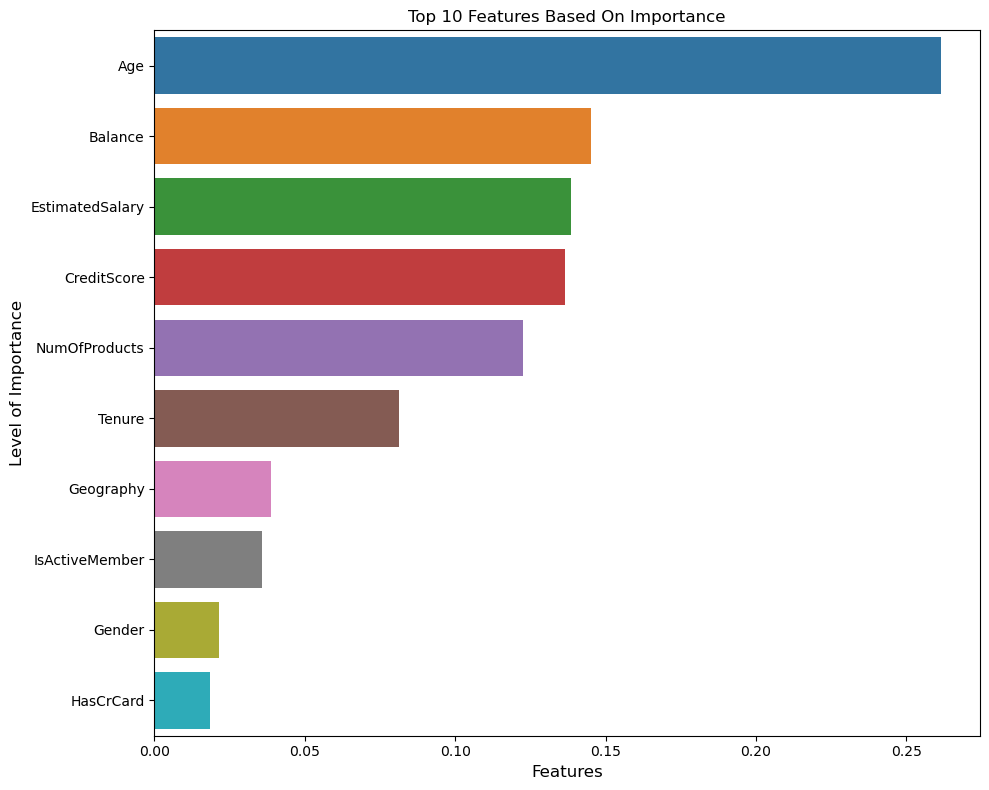

In [167]:
imp_df = pd.DataFrame({'Features' : x_train.columns , 'Importance' : classifier.feature_importances_ })

imp_feat =imp_df.sort_values(by ='Importance' , ascending = False)


fig = plt.figure(figsize = (10, 8))
sb.barplot( x= 'Importance' , y = 'Features' , data = imp_feat)
plt.title('Top 10 Features Based On Importance')
plt.xlabel('Features' , fontsize = 12)
plt.ylabel('Level of Importance' , fontsize = 12)
fig.tight_layout()
plt.show()

In [170]:
conf_matrix = confusion_matrix(predictions , y_test)

cols =['Predicted True' , 'Predicted False']
indices =['Actual True' , 'Actual False']

conf_matrix = pd.DataFrame(conf_matrix , columns = cols , index = indices)
conf_matrix

,Predicted True,Predicted False
Actual True,1566,209
Actual False,57,168


In [ ]:
from skelarn.metrics import roc_curve , roc_auc_score
y_pred_prob = classifier.predict_proba(x_test)[:][: , 1]